In [156]:
%load_ext autoreload 
%autoreload 2

import os
import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
test_dir = os.getcwd()
U_path = os.path.join(test_dir, "data", "RTB2004_CHAN1.csv")
I_path= os.path.join(test_dir, "data", "RTB2004_CHAN2.csv")

t,U = md.make_data_list(U_path)
t,I = md.make_data_list(I_path)


625000000.0


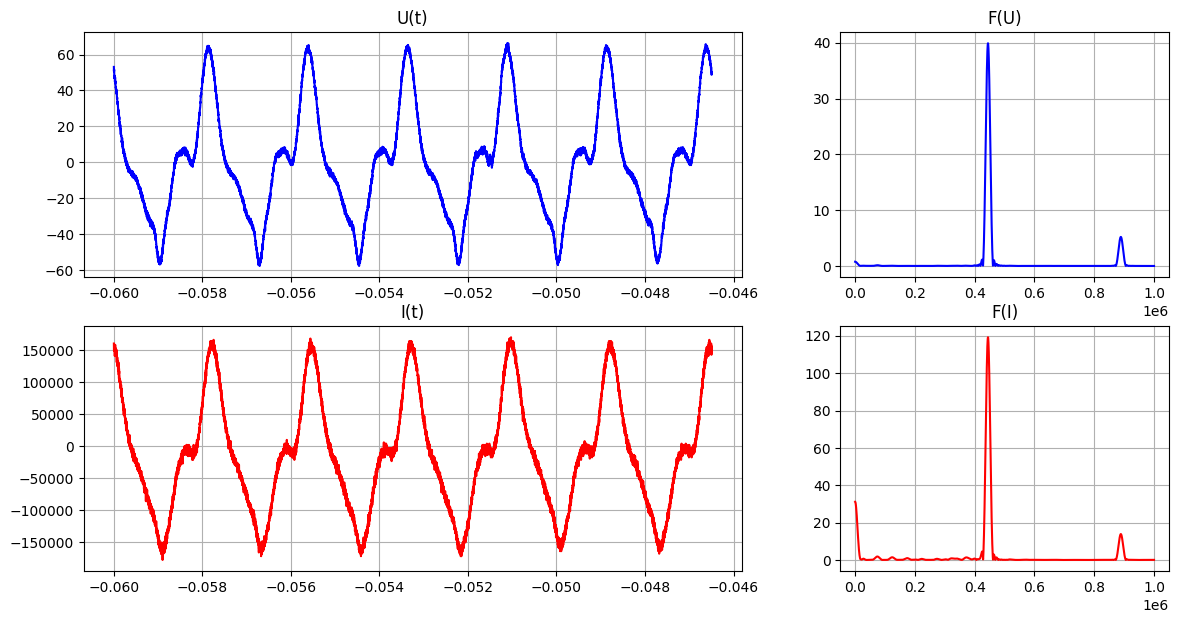

In [158]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)
window=T_counts*6

fs = 1 / np.mean(np.diff(t)) 
print(fs)
vw.show_I_U_2(t,I,U,0,window)

[-6.00000e-05 -5.99984e-05 -5.99968e-05 ...  5.99952e-05  5.99968e-05
  5.99984e-05]


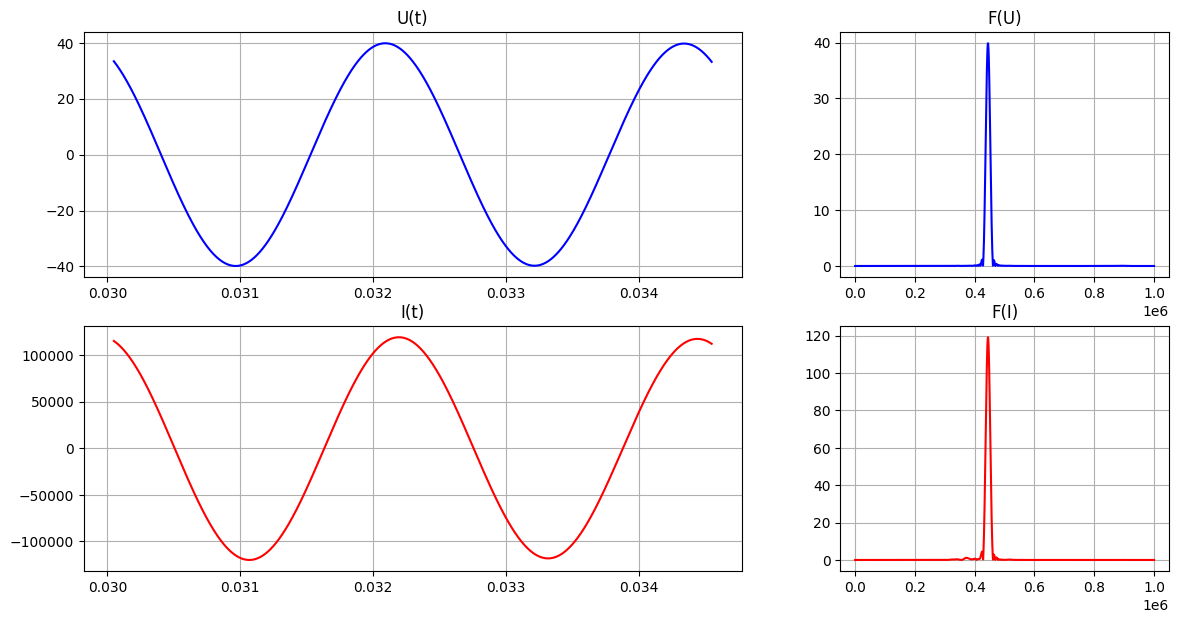

In [159]:
print (t)

t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,2)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,2)



vw.show_I_U_2(t_f,I_f, U_f,T_counts*40,T_counts*42)

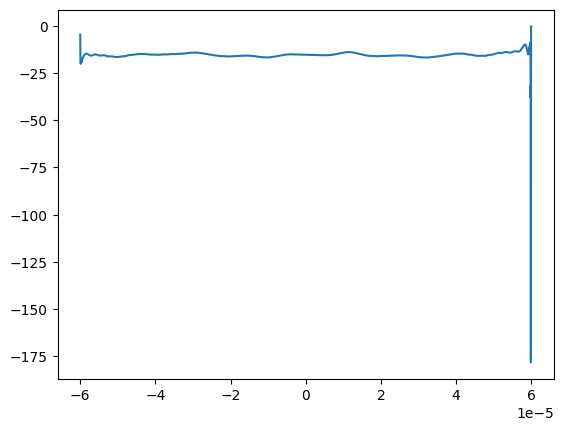

In [160]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f, U_f, I_f)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean_hilbert=phase_hilbert[central_index]

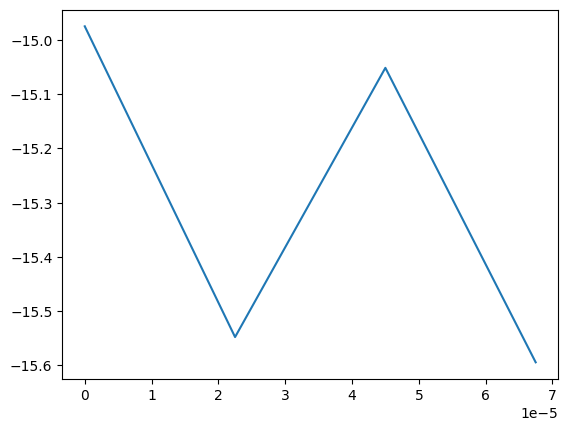

In [172]:
time_FFT, phase_FFT = md.get_phase_FFT(U_f, I_f, fs, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

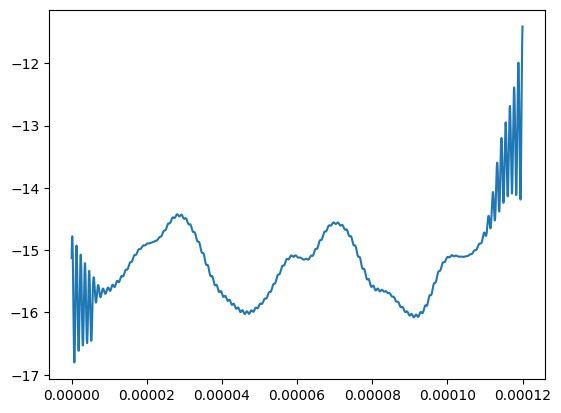

In [162]:
time_lockin, phase_lockin = md.get_phase_lockin(I_f,U_f,fs,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)

In [ ]:
def get_mean_value(sig):
    central_index=int(len(sig)/2)
    phase_mean=np.mean(sig[central_index-100:central_index+100])

    return phase_mean

def mid_F_rel(sig):
    central_index=int(len(sig)/2)
    #phase_central=sig[central_index]
    #f_rel = F_peak_calc * np.cos(phase_central*0.0174533) / np.sin(phase_central*0.0174533)

    phase_mean=np.mean(sig[central_index-100:central_index+100])
    f_rel = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
    return f_rel

In [164]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

1628931.1387299653


In [165]:
print(mid_F_rel(phase_hilbert))
print(mid_F_rel(phase_FFT))
print(mid_F_rel(phase_lockin))

-1653365.0824221268
-1652734.9105332128
-1646522.125517873


In [174]:
R=0.28
C=757e-12

phase_real=md.get_phase_RC_real(F_peak_calc,R,C)

print(phase_real)

0.033913596039453923


In [175]:
# Сравнение частоты 


f_rel_real=1/(2*pi*R*C)
f_rel_real

750872537.7047336